In [1]:
cd /content/drive/My Drive/bert

/content/drive/My Drive/bert


In [2]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 12.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [3]:
#!pip install transformers fugashi==1.1.0 ipadic==1.0.0 pytorch-lightning pip matplotlib
!pip install transformers pytorch-lightning pip matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.2/895.2 KB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 KB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 KB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 KB 9.4 MB/s eta 0:0

In [4]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00


In [5]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.0 MB/s eta 0:00:00


In [6]:
import random
import glob
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.model_selection import KFold
import pytorch_lightning as pl
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# 日本語の事前学習モデル
MODEL_NAME = 'albert-base-v2'

In [7]:
import Bert_moduel as myfunction

Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [8]:
counselors = myfunction.concat()[0]
codes = myfunction.change_code(myfunction.concat()[1])

In [9]:
persuade_with = ["Looking at your A1C level, it is apparent that you’ve been having some trouble controlling your blood sugar levels, despite your best efforts. My best advice at this point is for you is to switch to injectable insulin and give up the oral medication. But I don’t know if that is something you are willing to consider. I’d welcome your thoughts. "," I got my own child to clean his room by using a star chart. He got a star for every day he cleaned his room and after he earned seven stars, he got to choose the movie for Saturday night.","I’ve had good luck with clients using the nicotine gum.","From my professional experience, I think that going to cardiac rehab would be the best thing for you. What do you think about this as an option?","The choice is yours, but in my opinion, staying in treatment would be a good thing for you.","Well, your father was a problem drinker so you definitely have an increased risk according to the numbers. But everyone is unique. What are your own thoughts about that?","For some of my clients, daycare can turn out to be a real lifesaver especially when life gets as demanding as yours is right now. But I know you’ve mentioned your concerns about that, so maybe it is not for you no matter what."," I got my own child to clean his room by using a star chart. He got a star for every day he cleaned his room and after he earned seven stars, he got to choose the movie for Saturday night."," I’ve had good luck with clients using the nicotine gum.",]
gi = ["Yeah, it was picked up by the school. Then the teacher called the social worker, and you had a discussion with the social worker.","And you spoke to the social worker who felt that because you were involved in physical contact with your child, that that was something that might make you suitable for this program that I run here","Six classes. That’s right. And are you OK about attending?"]
confront = ["And then how do you see the link between being a good Dad and hitting your child like that? I don’t mean to be rude, but if you don’t want to come to the classes, how does that puzzle fit together for you. Can you see what I’m saying?","Oh right. I get it. So as far as you’re concerned, it’s OK to hit the child, because you’re the father of the house, and so coming here now is not something that you really want to do.","OK. Well, it can be a problem if somebody hits their child to the point where there’s a mark and it’s noticed by a teacher. Can you see why that’s a problem?","Right OK, but I mean, you did hit the child.","You did hit the child, and that’s the problem that we want to try and tackle in the parenting classes, to see if there are more constructive ways of disciplining the children, other than by hitting them."]
persuade = ["From my professional experience, I think that going to cardiac rehab is the best choice for you. ","It worked for me, and it will work for you if you give it a try. We need to find the right AA meeting for you. You just didn’t find a good one.","I would recommend that you always wear a bike helmet. It will really protect you in the event of a crash.","Continuing to drink at these levels can really harm your liver.","You can’t get five fruits and vegetables in your diet every day unless you put some fruit in your breakfast.","I used to be overweight but I decided to take my life into my own hands. You would be better off if you did the same thing.","You just don’t know how good your life can be if you quit drinking altogether. ","Well, your own father was a heavy drinker so it’s very likely you are too. ","All of these things added together tell me that you will have a lot of trouble managing your blood sugar levels without some medication to help. I wouldn’t tell you this unless I really thought it was the best thing for you. My job is to help you feel better, and I take that very seriously.","If you use a condom every time you have sex, then you never have to worry about whether you might have contracted a sexually transmitted infection. Wouldn’t that be great?","With everything going on in your life right now, how could it hurt to have your kids in daycare a couple of days a week? ","I have some ideas about getting your kids to help more. I got my own child to clean his room by using a star chart. He got a star for every day he cleaned his room and after he earned seven stars, he got to choose the movie for Saturday night."]
af = ["You came up with a lot of great ideas on how to reduce your drinking. Great job brainstorming today.","It’s important to you to be a good parent, just like your folks were for you. ","I am really proud of you.","You have been able to avoid sweets throughout the holiday and you’re proud of your accomplishment. It has paid off!","You are the kind of person who takes her responsibilities seriously, wanting to do the right thing.","With the parking problems and the rain coming down, it hasn’t been easy to get here. I appreciate that you continue to come.","You’ve been working so hard at being a good parent. I’m so impressed with your willingness to stay in there even when the going gets tough! ","Given what you have told me about your previous success with losing weight, I am confident that you will be successful again when you are ready."]

In [10]:
for example,gi_ex,confront_ex,persuade_ex,af_ex in zip(persuade_with,gi,confront,persuade,af):
  counselors.append(example)
  codes.append(2)
  counselors.append(gi_ex)
  codes.append(0)
  counselors.append(confront_ex)
  codes.append(9)
  counselors.append(persuade_ex)
  codes.append(1)
  counselors.append(af_ex)
  codes.append(6)

In [11]:
import collections
count = collections.Counter(codes)

In [12]:
#変更する変数
train_test = 0.6
encode_len = 512
T_len = 10
T_start = 0
T_stop = T_start + T_len + 1
epoch_number = 1
k_number = 2
seed = 1
SSL_range = 5
dir_name = f"T{T_start}_{T_stop}-SSLrange_{SSL_range}-datarate_{int(train_test*100)}"
np.random.seed(seed)
np.set_printoptions(precision=3)

In [13]:
border = [int(count[x]*train_test) for x in range(11)]

In [14]:
zipped = list(zip(counselors, codes))
np.random.shuffle(zipped)
train_data = []
train_label = []
test_data = []
test_label = []

for zipped_data in zipped:
  if collections.Counter(train_label)[zipped_data[1]] < border[zipped_data[1]]:
    train_data.append(zipped_data[0])
    train_label.append(zipped_data[1])
  else:
    test_data.append(zipped_data[0])
    test_label.append(zipped_data[1])


In [15]:
class AlbertForSequenceClassification_pl(pl.LightningModule):
    pred = []
    y = []
    ac = []
    def __init__(self, model_name, num_labels, lr):
        # model_name: Transformersのモデルの名前
        # num_labels: ラベルの数
        # lr: 学習率

        super().__init__()
        
        # 引数のnum_labelsとlrを保存。
        # 例えば、self.hparams.lrでlrにアクセスできる。
        # チェックポイント作成時にも自動で保存される。
        self.save_hyperparameters() 

        # BERTのロード
        self.bert_sc = AlbertForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels
        )

        AlbertForSequenceClassification_pl.pred = []
        AlbertForSequenceClassification_pl.y = []
        AlbertForSequenceClassification_pl.ac = []

        
    # 学習データのミニバッチ(`batch`)が与えられた時に損失を出力する関数を書く。
    # batch_idxはミニバッチの番号であるが今回は使わない。
    def training_step(self, batch, batch_idx):
        output = self.bert_sc(**batch)
        loss = output.loss
        self.log('train_loss', loss) # 損失を'train_loss'の名前でログをとる。
        return loss
        
    # 検証データのミニバッチが与えられた時に、
    # 検証データを評価する指標を計算する関数を書く。
    def validation_step(self, batch, batch_idx):
        output = self.bert_sc(**batch)
        val_loss = output.loss
        self.log('val_loss', val_loss) # 損失を'val_loss'の名前でログをとる。

    # テストデータのミニバッチが与えられた時に、
    # テストデータを評価する指標を計算する関数を書く。
    def test_step(self, batch, batch_idx):
      if 'labels' in batch.keys():
          labels = batch.pop('labels') # バッチからラベルを取得
          output = self.bert_sc(**batch)
          labels_predicted = output.logits.argmax(-1)
          AlbertForSequenceClassification_pl.pred += labels_predicted.tolist()
          AlbertForSequenceClassification_pl.y += labels.tolist()
          num_correct = ( labels_predicted == labels ).sum().item()
          accuracy = num_correct/labels.size(0) #精度
          self.log('accuracy', accuracy) # 精度を'accuracy'の名前でログをとる。
          AlbertForSequenceClassification_pl.ac.append(accuracy)
      else:
        output = self.bert_sc(**batch)
        labels_predicted = output.logits.argmax(-1)
        AlbertForSequenceClassification_pl.pred += labels_predicted.tolist()
    # 学習に用いるオプティマイザを返す関数を書く。
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

In [16]:
# 6-15
# 学習時にモデルの重みを保存する条件を指定
checkpoint = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    save_weights_only=True,
    dirpath='model/',
)

# 学習の方法を指定
trainer = pl.Trainer(
    gpus=1, 
    max_epochs=epoch_number,
    callbacks = [checkpoint]
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [17]:
T = myfunction.load_nonlabel()[T_start:T_stop]

In [ ]:
# 6-11
# カテゴリーのリスト
# トークナイザのロード
tokenizer = AlbertTokenizer.from_pretrained(MODEL_NAME)

bert_sc = AlbertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=11
)
#bert_sc = bert_sc.cuda()

# 各データの形式を整える
nonlabeled_data = []

for text in T:
  encoding = tokenizer(
  text,
  max_length=encode_len, 
  padding='max_length'
  )
  encoding = { k: torch.tensor(v,device=0) for k, v in encoding.items() }
  nonlabeled_data.append(encoding)
nonlabeled_data = DataLoader(nonlabeled_data,batch_size=8)


dataset_for_loader = myfunction.make_tensor(train_data,train_label)
test_for_loader = myfunction.make_tensor(test_data,test_label)

dataloader_test = DataLoader(test_for_loader, batch_size=16)

Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

In [ ]:
import collections
c = collections.Counter(train_label)
for key in range(11):
  print(f"{key}：{c[key] * 100 / len(train_label)}")

0：2.830188679245283
1：0.9433962264150944
2：0.9433962264150944
3：15.09433962264151
4：17.92452830188679
5：34.905660377358494
6：1.8867924528301887
7：2.830188679245283
8：0.9433962264150944
9：0.9433962264150944
10：20.754716981132077


In [ ]:
c = collections.Counter(train_label)
for key in range(11):
  print(f"{key}：{c[key] * 100 / len(test_label)}")

0：3.7974683544303796
1：1.2658227848101267
2：1.2658227848101267
3：20.253164556962027
4：24.050632911392405
5：46.835443037974684
6：2.5316455696202533
7：3.7974683544303796
8：1.2658227848101267
9：1.2658227848101267
10：27.848101265822784


In [ ]:
def CV_training(dataset):
  kf = KFold(n_splits=k_number)
  for train_index, test_index in kf.split(dataset):
      model = AlbertForSequenceClassification_pl(
      MODEL_NAME, num_labels=11, lr=1e-5
      )
      dataset_train = dataset_for_loader[train_index[0]:train_index[-1]] # 学習データ
      dataset_val = dataset_for_loader[test_index[0]:test_index[-1]] # 検証データ

      dataloader_train = DataLoader(
      dataset_train, batch_size=8, shuffle=True
      ) 
      dataloader_val = DataLoader(dataset_val, batch_size=8)
      # ファインチューニングを行う。
      trainer.fit(model, dataloader_train, dataloader_val)


In [ ]:
def SSL(dataset):
    kf = KFold(n_splits=k_number)
    for train_index, test_index in kf.split(dataset):
        best_model_path = checkpoint.best_model_path
        model = AlbertForSequenceClassification_pl.load_from_checkpoint(
        best_model_path, num_labels=11, lr=1e-5
        )

        #dataset_train = dataset_for_loader[train_index[0]:train_index[-1]+1] # 学習データ
        #dataset_val = dataset_for_loader[test_index[0]:test_index[-1]+1] # 検証データ

        dataset_train = []
        dataset_val = []
        
        #print(len(dataset_for_loader))
        #print(train_index,test_index)
        for tr_index in train_index:
          dataset_train.append(dataset[tr_index])
        for va_index in test_index:
          dataset_val.append(dataset[va_index])
        
        dataloader_train = DataLoader(
        dataset_train, batch_size=8, shuffle=True
        ) 
        dataloader_val = DataLoader(dataset_val, batch_size=8)
        # ファインチューニングを行う。
        trainer.fit(model, dataloader_train, dataloader_val)
        print(best_model_path)


In [ ]:
def ConfusionMatrix():
  l = AlbertForSequenceClassification_pl.pred
  lab = AlbertForSequenceClassification_pl.y
  confusion_matrix = np.zeros((11,11))
  for d0,d1 in zip(l,lab):
    confusion_matrix[d1][d0] += 1
  return confusion_matrix

In [ ]:
ac = []
recall = []
precision = []
f1 = []
cm = []

In [ ]:
def verification():
  list_y = AlbertForSequenceClassification_pl.y
  list_pred = AlbertForSequenceClassification_pl.pred
  accuracy = AlbertForSequenceClassification_pl.ac

  ac.append(accuracy)
  recall.append(recall_score(list_y,list_pred,average="weighted"))
  precision.append(precision_score(list_y,list_pred,average="weighted"))
  f1.append(f1_score(list_y,list_pred,average="weighted"))
  cm.append(ConfusionMatrix())

In [ ]:
CV_training(dataset_for_loader)
test = trainer.test(test_dataloaders=dataloader_test)
verification()

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:429: UserWarning: The number of training samples (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:907: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1399: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/My Drive/bert/model/epoch=0-step=6.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [ ]:
CV_training(dataset_for_loader)
#nonlabelでテストし、それをラベルにし新しいデータ作成
test = trainer.test(test_dataloaders=nonlabeled_data)
print(AlbertForSequenceClassification_pl.pred)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
[10, 5, 10, 10, 3, 10, 10, 3, 10, 10, 10, 10, 10, 10, 3, 10, 10, 5, 10, 10, 10, 5, 5, 10, 5, 3, 3, 10, 5, 10, 5, 10, 5, 5, 3, 3, 5, 5, 10, 5, 5, 10, 10, 10, 5, 3, 10, 5, 3, 10, 4, 10, 10, 10, 10, 5, 3, 10, 5, 10, 10, 5, 10, 10, 10, 5, 5, 10, 10, 10, 5, 10, 5, 10, 10, 10, 10, 5, 3, 5, 5, 3, 5, 5, 10, 10, 3, 3, 5, 10, 3, 10, 5, 5, 5, 5, 5, 10, 3, 10, 5, 5, 10, 10, 10, 5, 5, 10, 3, 10, 10, 3, 5, 5, 5, 10, 10, 3, 3, 10, 5, 5, 3, 5, 5, 5, 5, 5, 5, 10, 3, 5, 5, 5, 5, 10, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 10, 3, 5, 3, 10, 10, 3, 5, 3, 3, 10, 5, 10, 5, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 5, 5, 3, 10, 5, 10, 3, 10, 3, 5, 5, 3, 5, 5, 5, 3, 10, 10, 10, 5, 10, 10, 3, 10, 10, 10, 10, 10, 5, 10, 10, 10, 5, 10, 5, 5, 3, 10, 10, 5, 10, 5, 10, 5, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 

In [ ]:
for _ in range(SSL_range):
  CV_training(dataset_for_loader)
  #nonlabelでテストし、それをラベルにし新しいデータ作成
  test = trainer.test(test_dataloaders=nonlabeled_data)
  
  T_and_anoted = list(zip(T,AlbertForSequenceClassification_pl.pred))

  for ind in reversed(range(len(T))):
    if T_and_anoted[ind][1] == 3 or T_and_anoted[ind][1] == 4 or T_and_anoted[ind][1] == 5 or T_and_anoted[ind][1] == 10:
      del T_and_anoted[ind]

  new_anote = codes + [x[1] for x in T_and_anoted]
  new_corpas = counselors + [x[0] for x in T_and_anoted]


  new_data = myfunction.make_tensor(new_corpas,new_anote)
  #newデータでトレーニング
  SSL(new_data)
  #ラベル付きでテスト
  test = trainer.test(test_dataloaders=dataloader_test)
  verification()

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.49367088079452515}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exact

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.49367088079452515}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exact

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.49367088079452515}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exact

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.49367088079452515}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exact

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1395: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

Validation sanity check: 0it [00:00, ?it/s]

Restoring states from the checkpoint path at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


/content/drive/MyDrive/bert/model/epoch=19-step=219.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.49367088079452515}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i,a in enumerate(ac):
  ac[i] = sum(a) / len(a)

In [ ]:
cd /content/drive/My Drive/bert/model

/content/drive/My Drive/bert/model


In [ ]:
rm *

In [ ]:
recall = np.array(recall)
precision = np.array(precision)
f1 = np.array(f1)
ac = np.array(ac)

In [ ]:
print(f"recall：{recall}\nprecision：{precision}\nf1：{f1}\naccuacy：{ac}")

recall：[0.494 0.747 0.747 0.747 0.747 0.747]
precision：[0.444 0.705 0.705 0.705 0.705 0.705]
f1：[0.425 0.707 0.707 0.707 0.707 0.707]
accuacy：[0.494 0.747 0.747 0.747 0.747 0.747]


In [ ]:
x = range(SSL_range+1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os
os.mkdir(f"/content/drive/My Drive/bert/result_remove/{dir_name}")

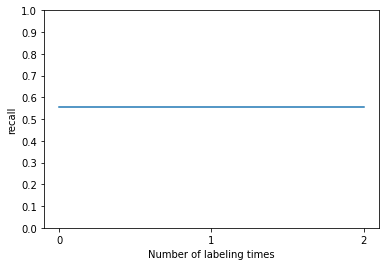

In [ ]:
plt.xlabel("Number of labeling times")
plt.xticks(np.arange(0, SSL_range+1, step=1.0))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('recall')
plt.ylim(0, 1.00)
plt.plot(x,recall)
plt.savefig(f"/content/drive/My Drive/bert/result_plt/{dir_name}/recall.png")

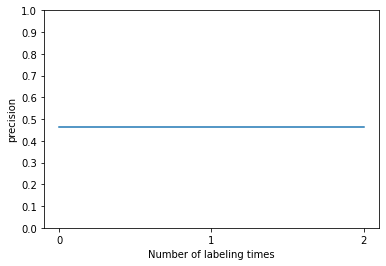

In [ ]:
plt.xlabel("Number of labeling times")
plt.xticks(np.arange(0, SSL_range+1, step=1.0))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('precision')
plt.ylim(0, 1.00)
plt.plot(x,precision)
plt.savefig(f"/content/drive/My Drive/bert/result_plt/{dir_name}/precision.png")

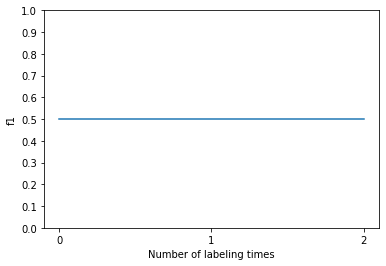

In [ ]:
plt.xlabel("Number of labeling times")
plt.xticks(np.arange(0, SSL_range+1, step=1.0))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('f1')
plt.ylim(0, 1.00)
plt.plot(x,f1)
plt.savefig(f"/content/drive/My Drive/bert/result_plt/{dir_name}/f1.png")

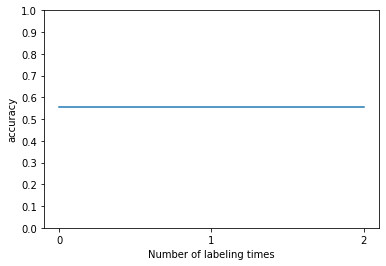

In [ ]:
plt.xlabel("Number of labeling times")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, SSL_range+1, step=1.0))
plt.ylabel('accuracy')
plt.ylim(0, 1.00)
plt.plot(x,accuacy)
plt.savefig(f"/content/drive/My Drive/bert/result_plt/T0_11-SSLrange_2-datarate_60/accuracy.png")

In [ ]:
w = f"recall：{str(recall)}\nprecision{str(precision)}\nf1：{f1}\naccuacy：{str(ac)}\n"
with open(f"/content/drive/My Drive/bert/result_remove/{dir_name}/output.txt",mode="w") as f:
  f.write(f"train_test：{train_test},encode_len：{encode_len},T_len{T_len}\n")
  f.write(f"T_start：{T_start},epoch_number：{epoch_number},k_number：{k_number}\n")
  f.write(f"seed：{seed},SSL_range：{SSL_range}\n")
  f.write(w)
  for c in cm:
    f.write(f"\n{(str(c))}")

In [ ]:
cm[0]

array([[ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0., 22.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  3.,  3.,  0.,  0.,  0.,  0.,  9.]])

In [ ]:
cm[1]

array([[ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8.,  4.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0., 13.]])